In [7]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import pandas as pd
import corner

In [45]:
%%file measured_properties.txt
# These are stellar properties measured by Shporer et al.
epic_id mass_A radius_A mass_B radius_B
202900527 1.068 1.695 0.1459 0.1702
206155547 0.916 1.410 0.1616 0.2002
206432863 0.964 1.171 0.0924 0.0913

Overwriting measured_properties.txt


In [29]:
measured = pd.read_table('measured_properties.txt', delim_whitespace=True, index_col=0)

In [39]:
def get_samples(epic_id):
    store = pd.HDFStore(os.path.join(str(epic_id), 'dartmouth_starmodel_binary.h5'))
    return store['samples']  

def plot_corner(epic_id):
    cols = ['mass_A', 'radius_A', 'mass_B', 'radius_B']
    s = get_samples(epic_id)
    s['radius_A'] = s['radius']
    truths = measured.loc[epic_id]
    ranges = []
    for i,c in enumerate(cols):
        ranges.append((min(truths[c]-0.05, s[c].min()),
                       max(truths[c]+0.05, s[c].max())))
    fig = corner.corner(s[cols], labels=cols, truths=truths,
                       range=ranges)
    fig.suptitle(epic_id)
    return fig

## 202900527 (K2-51)

![](202900527/FPPsummary.png)

We see here that while the prior for the EB scenario is pretty similar to the prior for the planet scenario, the EB likelihood is *very* small.  Why is this?  Let's take a look below comparing the stellar properties fit by `isochrones` within the `vespa` procedure, and those properties measured by Shporer et al.:

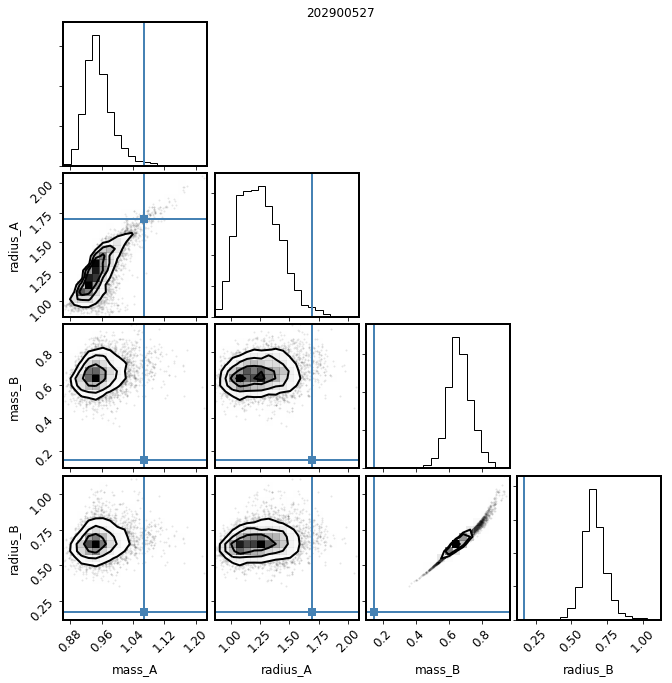

In [46]:
plot_corner(202900527);

Here, we see that both the derived primary and secondary star properties are way off.  Let's take a look at how well the observed data used to fit the star properties matches with the samples:

![](202900527/dartmouth_starmodel_triangle_binary_observed.png)

The WISE magnitudes seem pretty far off, which could very well be what is trying to force the secondary star to be a 0.7 Msun, instead of just letting it peacefully settle into being a faint, low-mass star.  That seems to be the main issue here, but a compounding factor could be that the measured primary radius is significantly larger than the estimated one, which would also lead to a wrong shape distribution for the EB scenario.  

This is the shape distribution resulting from this binary star fit.  Unsurprisingly, it does not match the observed shape of the signal well at all---it is too boxy and too long to be caused by the binary star scenario this fit is proposing.

![](202900527/eb.png)


## 206155547 (K2-67)

![](206155547/FPPsummary.png)

Here again, the EB likelihood is ~1000x smaller than the planet likelihood, which is not as dramatic as K2-51, but still enough to allow validation.  Let's take a closer look.

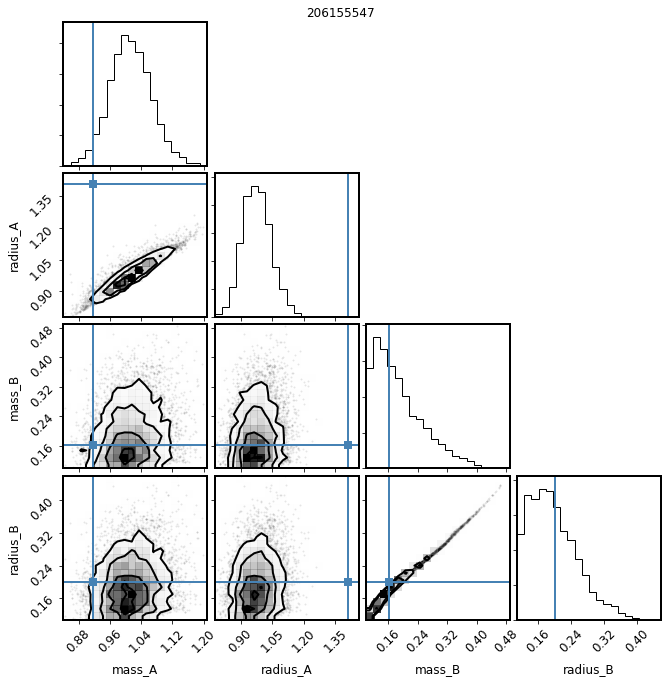

In [47]:
plot_corner(206155547);

For this one, the secondary is pretty accurate, but the primary radius is way off.  Looking at the "measured" `isochrones` binary star fit, it looks like there are significant inconsistencies between the provided primary spectroscopic properties and the properties that the photometry wants it it to have---and perhaps significant discrepancy between bands themselves---nothing about this fit looks very comfortable.

![title](206155547/dartmouth_starmodel_triangle_binary_observed.png)

And the result of this for the FPP calculation is that a primary star radius that is 40% too small makes the EB model not be able to reproduce the truth of what is actually happening---the truth is longer than we are expecting for a ~solar radius star, which kills the likelihood for the EB model, giving room for the planet model.

![title](206155547/eb.png)


## 206432863 (K2-76)

![](206432863/FPPsummary.png)

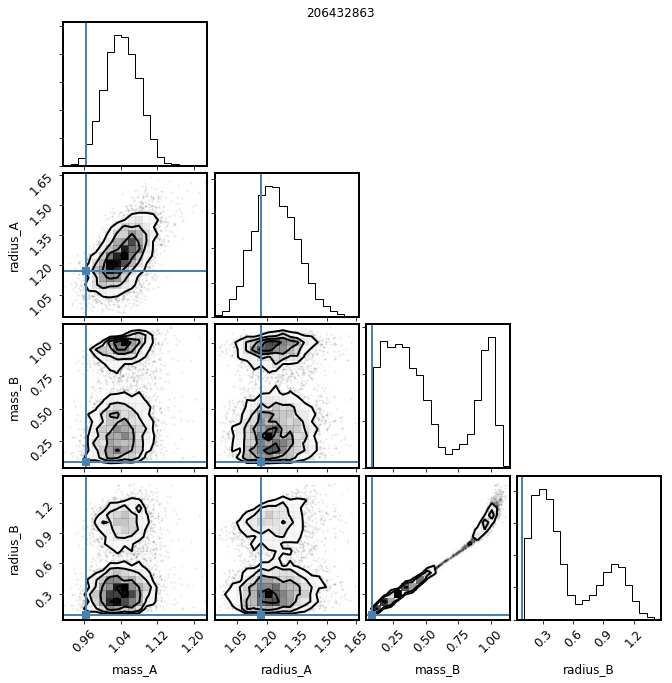

In [48]:
plot_corner(206432863);

This one is the best fit yet out of these three---except that the observed secondary mass of 0.09 Msun is literally off the charts of the Dartmouth grids!  This is really almost a brown dwarf by transit standards---not luminous enough to show up in secondary eclipse or give any indication as to is presence from its light, and is exactly the same size as a giant planet.  So this is a kind of system that will be *very* difficult for any light-curve-based analysis to find.

Additionally, let's look at the stellar fit to see if there is anything funny going on:

![](206432863/dartmouth_starmodel_triangle_binary_observed.png)

Nope, this is all pretty straightforward!  However, we can see that if a Gaia parallax had been available for this star, then the more luminous binary companions would have been ruled out, and perhaps more room would have been left in the EB model for stars that are very small and faint, like this companion!